# EasyVisa 

<div>
    <img src="https://contentstatic.techgig.com/thumb/msid-108050732,width-800,resizemode-4/Work-visas-and-permits-A-step-by-step-guide-to-unlock-your-global-career.jpg?739315" width="1000"

</div>)


Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended empl.

**Objective**:
Objective
In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help shortlist candidates with higher chances of VIthe case status.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, confusion_matrix, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import plot_tree
from os import system

%cd C:\Users\ajays\Dropbox\PGP-AIML\projects\easyvisa

C:\Users\ajays\Dropbox\PGP-AIML\projects\easyvisa


In [2]:
df = pd.read_csv("EasyVisa.csv")
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [3]:
df.shape

(25480, 12)

* *The data set has **25480 rows**. The **target** is represented by the column '**case_status**'*

In [4]:
df['case_id'].value_counts()

case_id
EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: count, Length: 25480, dtype: int64

In [5]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


* *There are no missing values in the data set*
* *The **case_id column** has **no influence on the machine learning model** for predicting case_status and hence can be **safely dropped*** 
* *The intention of **yr_of_estab** column seems to be able to **determine the age since company was established**. This can be better represented by a **new feature yrs_since_estab (years since establishment)** that can be interpreted as **numerical**.*

In [7]:
df.describe(include='all')

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
count,25480,25480,25480,25480,25480,25480.000000,25480.000000,25480,25480.000000,25480,25480,25480
unique,25480,6,4,2,2,NaN,NaN,5,NaN,4,2,2
top,EZYV01,Asia,Bachelor's,Y,N,NaN,NaN,Northeast,NaN,Year,Y,Certified
freq,1,16861,10234,14802,22525,NaN,NaN,7195,NaN,22962,22773,17018
mean,NaN,NaN,NaN,NaN,NaN,5667.043210,1979.409929,NaN,74455.814592,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,22877.928848,42.366929,NaN,52815.942327,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,-26.000000,1800.000000,NaN,2.136700,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1022.000000,1976.000000,NaN,34015.480000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,2109.000000,1997.000000,NaN,70308.210000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,3504.000000,2005.000000,NaN,107735.512500,NaN,NaN,NaN


In [8]:
df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [9]:
df['education_of_employee'].value_counts()

education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64

In [10]:
df['has_job_experience'].value_counts()

has_job_experience
Y    14802
N    10678
Name: count, dtype: int64

In [11]:
df['requires_job_training'].value_counts()

requires_job_training
N    22525
Y     2955
Name: count, dtype: int64

In [12]:
df['region_of_employment'].value_counts()

region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtype: int64

In [13]:
df['unit_of_wage'].value_counts()

unit_of_wage
Year     22962
Hour      2157
Week       272
Month       89
Name: count, dtype: int64

In [14]:
df['full_time_position'].value_counts()

full_time_position
Y    22773
N     2707
Name: count, dtype: int64

In [15]:
df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

* *There are **negative values for 'no_of_employees' feature** which seems incorrect. Further analysis required.*
* *The values for **'unit_of_wage' have 4 possible options**. It will be hard to compare these values along with the wage values. Further analysis required.*
* *The following seems to be a **list of categorical variables: continent, education_of_employee, has_job_experience, requires_job_training, region_of_employment, full_time_position, case_status***

In [16]:
df[df['no_of_employees'] <= 0]['no_of_employees'].value_counts()

no_of_employees
-11    9
-14    8
-26    7
-25    5
-17    4
Name: count, dtype: int64

* *There are only **33 rows** that have a **negative number of employees**. Since these are **very few compared to total number of observations**, we can **remove these errorneous observations** from the data set*

For the sake of easy interpretation, feature engineering can be carried out after EDA and visualisations

## Exploratory data analysis

### 1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

<Axes: xlabel='education_of_employee', ylabel='count'>

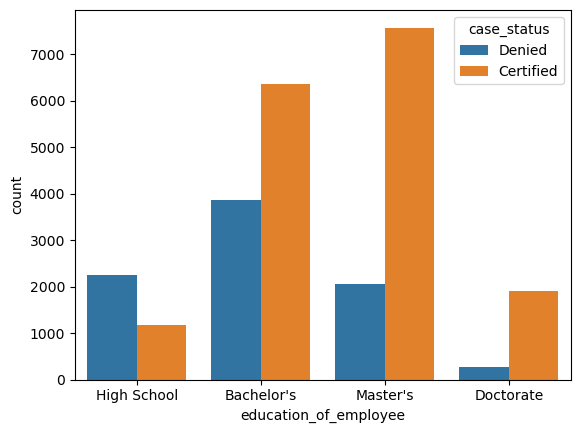

In [17]:
sns.countplot(data=df, hue='case_status', x='education_of_employee', order=["High School", "Bachelor's", "Master's", "Doctorate"])

In [18]:
df[df['education_of_employee'] == "High School"]["case_status"].value_counts(normalize=True)

case_status
Denied       0.659649
Certified    0.340351
Name: proportion, dtype: float64

In [19]:
df[df['education_of_employee'] == "Bachelor's"]["case_status"].value_counts(normalize=True)

case_status
Certified    0.622142
Denied       0.377858
Name: proportion, dtype: float64

In [20]:
df[df['education_of_employee'] == "Master's"]["case_status"].value_counts(normalize=True)

case_status
Certified    0.786278
Denied       0.213722
Name: proportion, dtype: float64

In [21]:
df[df['education_of_employee'] == "Doctorate"]["case_status"].value_counts(normalize=True)

case_status
Certified    0.872263
Denied       0.127737
Name: proportion, dtype: float64

* *Education has a significant influence on the Visa certification progress*
* *Applicants who have completed their **Bachelor's, Master's and Doctorate** have a **higher probablility of getting visa certified** at **62.2%, 78.6% and 87.2% respectively**. The magnitude of the percentages also indicates that **higher the education level, higher the chances of visa certification***
* *Applicants who have just completed **High School** have a **higher visa denial rate of 65.9%***

### 2. How does the visa status vary across different continents?

<Axes: xlabel='continent', ylabel='count'>

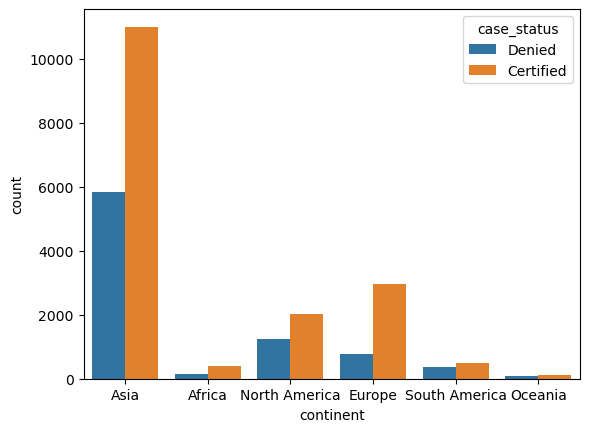

In [22]:
sns.countplot(data=df, hue='case_status', x='continent')

In [23]:
df[df['continent'] == "Asia"]["case_status"].value_counts(normalize=True)

case_status
Certified    0.653105
Denied       0.346895
Name: proportion, dtype: float64

In [24]:
df[df['continent'] == "Africa"]["case_status"].value_counts(normalize=True)

case_status
Certified    0.720508
Denied       0.279492
Name: proportion, dtype: float64

In [25]:
df[df['continent'] == "North America"]["case_status"].value_counts(normalize=True)

case_status
Certified    0.618773
Denied       0.381227
Name: proportion, dtype: float64

In [26]:
df[df['continent'] == "Europe"]["case_status"].value_counts(normalize=True)

case_status
Certified    0.792337
Denied       0.207663
Name: proportion, dtype: float64

In [27]:
df[df['continent'] == "South America"]["case_status"].value_counts(normalize=True)

case_status
Certified    0.578638
Denied       0.421362
Name: proportion, dtype: float64

In [28]:
df[df['continent'] == "Oceania"]["case_status"].value_counts(normalize=True)

case_status
Certified    0.635417
Denied       0.364583
Name: proportion, dtype: float64

* *The number of visa **certified applicants is higher than denied applicants in all continents***
* *The **highest number of applications** come from the **Asia** continent*
* *The **lowest number of applications** come from the **Oceania** continent*
* *The **highest percentages** of visa applications getting certified is from **Europe continent at 79.2%** and **Africa continent at 72%***
* *The **lowest percentages** of visa applications getting certified is from **North America continent at 61.9%** and **South America continent at 57.8%***

### 3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

<Axes: xlabel='has_job_experience', ylabel='count'>

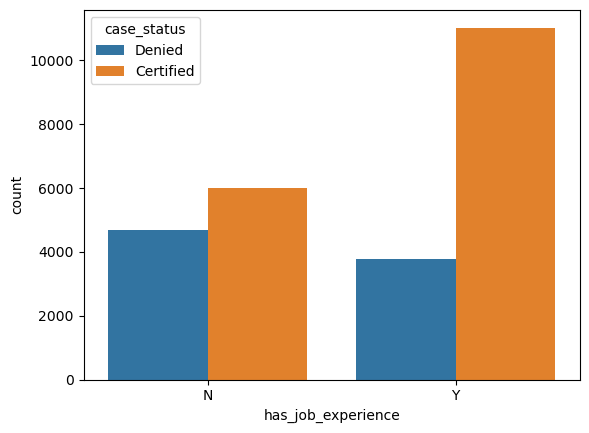

In [29]:
sns.countplot(data=df, hue='case_status', x='has_job_experience')

In [30]:
df[df['has_job_experience'] == "N"]["case_status"].value_counts(normalize=True)

case_status
Certified    0.561341
Denied       0.438659
Name: proportion, dtype: float64

In [31]:
df[df['has_job_experience'] == "Y"]["case_status"].value_counts(normalize=True)

case_status
Certified    0.744764
Denied       0.255236
Name: proportion, dtype: float64

* ***Irrespective of whether the applicants have job experience or not, the number of visa certified aplicants are greater than denied ones***
* ***Having job experience has a big impact on the probability of getting visa certified***
* ***74.5% of experienced candidates** got visa certified*
* *Only **56.15% of inexperienced candidates** got visa certified*

### 4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

<Axes: xlabel='unit_of_wage', ylabel='count'>

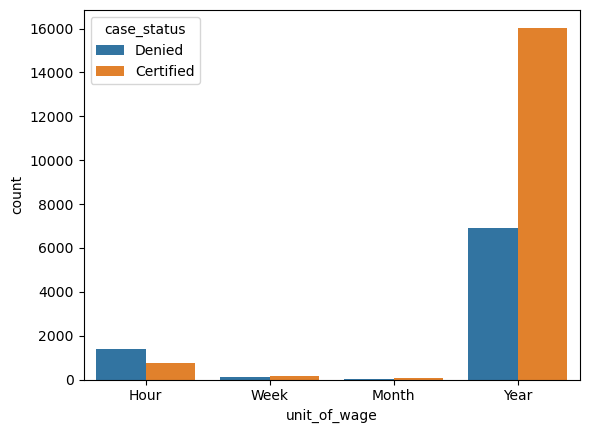

In [32]:
sns.countplot(data=df, hue='case_status', x='unit_of_wage', order=['Hour', 'Week', 'Month', 'Year'])

In [33]:
df[df['unit_of_wage'] == "Hour"]["case_status"].value_counts(normalize=True)

case_status
Denied       0.653686
Certified    0.346314
Name: proportion, dtype: float64

In [34]:
df[df['unit_of_wage'] == "Week"]["case_status"].value_counts(normalize=True)

case_status
Certified    0.621324
Denied       0.378676
Name: proportion, dtype: float64

In [35]:
df[df['unit_of_wage'] == "Month"]["case_status"].value_counts(normalize=True)

case_status
Certified    0.617978
Denied       0.382022
Name: proportion, dtype: float64

In [36]:
df[df['unit_of_wage'] == "Year"]["case_status"].value_counts(normalize=True)

case_status
Certified    0.69885
Denied       0.30115
Name: proportion, dtype: float64

* ***Hourly wage associates** are **least preferred** for visa certification and have a **high denial rate of 65.3%***
* *Other wage employees have a **close certification rate in the 60s percentages** indicating that there is **not much difference of probabilities in certification chances**.*
* *The **maximum number of visa applications** received are from the **yearly wage applicants**.*

### 5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

The prevailing wage needs to be considered along with the unit of wage. However, since there are 4 possible unit of wages, we need to bring in **similarity of the wage values for all rows to correspond to one unit**. FOr the sake of a smaller magnitude of values, let us **engineer a new feature 'hourly_wages'**. 

In [37]:
# Considering 40hrs/week standard, hourly wage is equal to yearly_wage/(52*40) and monthly_wage/(40*4) and weekly_wage/40

#copy all values to new feature
df['hourly_wages'] = df['prevailing_wage']

#selectively modify wage values as per above assumption
df.loc[df['unit_of_wage'] == 'Year', 'hourly_wages'] = df.loc[df['unit_of_wage'] == 'Year', 'hourly_wages']/(52 * 40)
df.loc[df['unit_of_wage'] == 'Month', 'hourly_wages'] = df.loc[df['unit_of_wage'] == 'Month', 'hourly_wages']/(4 * 40)
df.loc[df['unit_of_wage'] == 'Week', 'hourly_wages'] = df.loc[df['unit_of_wage'] == 'Week', 'hourly_wages']/40

df.head()


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,hourly_wages
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,592.202900
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,40.108486
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,59.133106
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,40.112514
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,72.070861


<Axes: xlabel='hourly_wages', ylabel='case_status'>

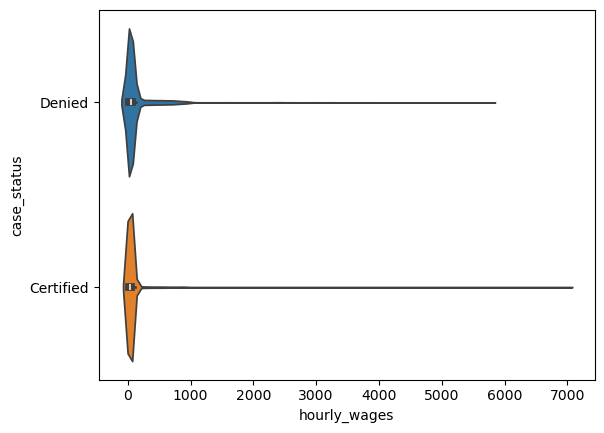

In [38]:
sns.violinplot(data=df, x='hourly_wages', y='case_status', hue='case_status')

* ***Majority** of the applicants are in the very **low 0-100 range***
* *The hourly_wages value has extremely **high variance***
* *Applicants of high **hourly wage > about 5800 are all certified***

### Other insights

#### Job experience v/s Training requirement

<Axes: xlabel='has_job_experience', ylabel='count'>

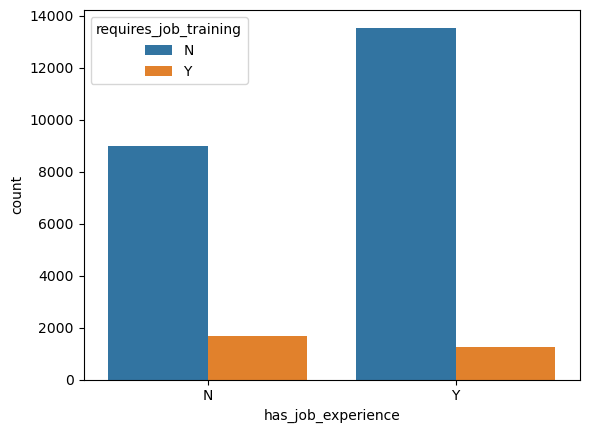

In [39]:
sns.countplot(data=df, x='has_job_experience', hue='requires_job_training')

* *A significantly **high number of applicants require no job training** compared to those who do*

#### Count of applications by continent

<Axes: xlabel='continent', ylabel='count'>

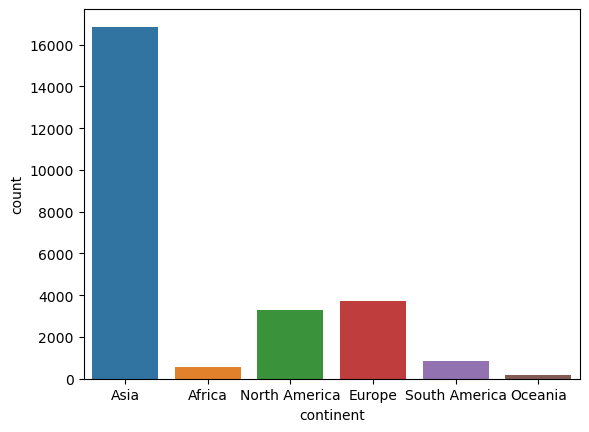

In [40]:
sns.countplot(data=df, hue='continent', x='continent')

In [41]:
df['continent'].value_counts(normalize=True)

continent
Asia             0.661735
Europe           0.146468
North America    0.129199
South America    0.033438
Africa           0.021625
Oceania          0.007535
Name: proportion, dtype: float64

* ***Asia continent has the highest number of applications at 66%** by a very big margin, whereas **Oceania continent has the lowest at 0.7%***

#### Count of applications by education level

<Axes: xlabel='education_of_employee', ylabel='count'>

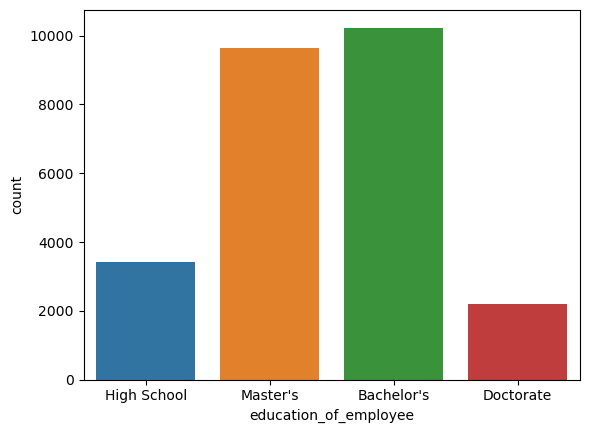

In [42]:
sns.countplot(data=df, hue='education_of_employee', x='education_of_employee')

In [43]:
df['education_of_employee'].value_counts(normalize=True)

education_of_employee
Bachelor's     0.401648
Master's       0.378100
High School    0.134223
Doctorate      0.086028
Name: proportion, dtype: float64

* *People with **Bachelor's and Master's education contribute to about 78% of applications** in the data set*

#### Count of applications by training requirement

<Axes: xlabel='requires_job_training', ylabel='count'>

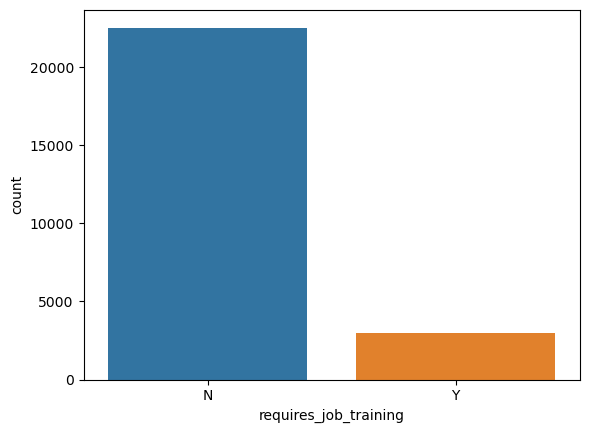

In [44]:
sns.countplot(data=df, hue='requires_job_training', x='requires_job_training')

In [45]:
df['requires_job_training'].value_counts(normalize=True)

requires_job_training
N    0.884027
Y    0.115973
Name: proportion, dtype: float64

* ***88.4% of the visa applicants require job training***

#### Count of applications by job experience

<Axes: xlabel='has_job_experience', ylabel='count'>

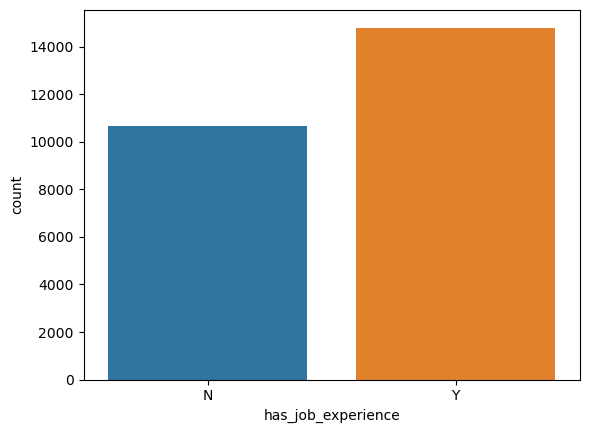

In [46]:
sns.countplot(data=df, hue='has_job_experience', x='has_job_experience')

In [47]:
df['has_job_experience'].value_counts(normalize=True)

has_job_experience
Y    0.580926
N    0.419074
Name: proportion, dtype: float64

* *The data set has a **good mix of experienced and inexperienced candidates of 58% and 42%** respectively*

#### Count of applications by region of employment

<Axes: xlabel='region_of_employment', ylabel='count'>

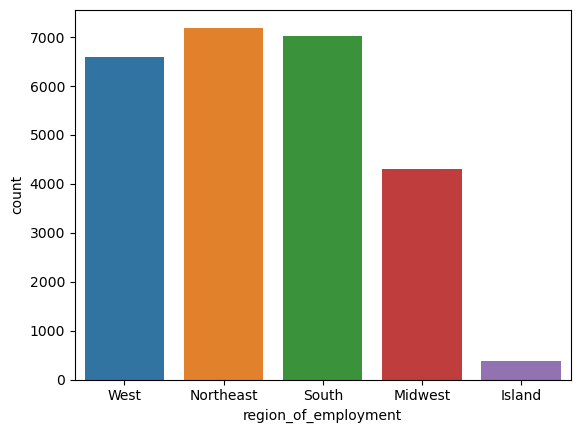

In [48]:
sns.countplot(data=df, hue='region_of_employment', x='region_of_employment')

In [49]:
df['region_of_employment'].value_counts(normalize=True)

region_of_employment
Northeast    0.282378
South        0.275392
West         0.258477
Midwest      0.169035
Island       0.014717
Name: proportion, dtype: float64

* *Regions of employment is **fairly consistent across most regions of the US**, except the **Island region that accounts for about 1.5%** only*

#### Count of applications by full time position status of job

<Axes: xlabel='full_time_position', ylabel='count'>

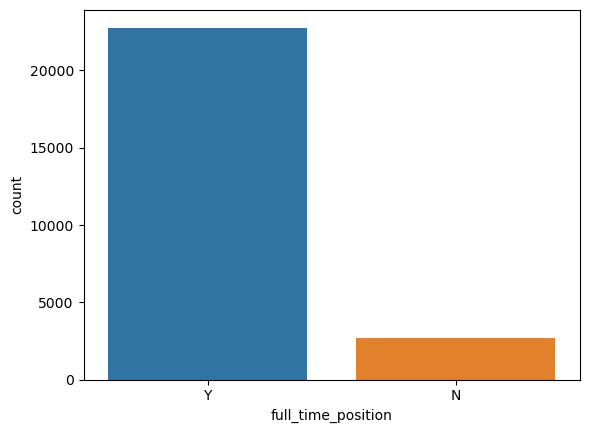

In [50]:
sns.countplot(data=df, hue='full_time_position', x='full_time_position')

In [51]:
df['full_time_position'].value_counts(normalize=True)

full_time_position
Y    0.89376
N    0.10624
Name: proportion, dtype: float64

* **89% of the applicants considered full time positions***

#### Count of applications by visa case status

<Axes: xlabel='case_status', ylabel='count'>

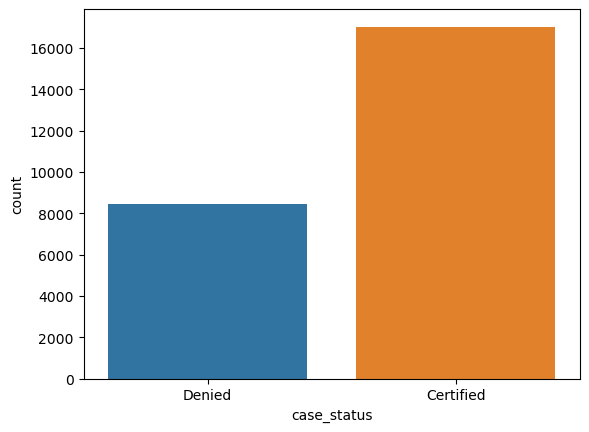

In [52]:
sns.countplot(data=df, hue='case_status', x='case_status')

In [53]:
df['case_status'].value_counts(normalize=True)

case_status
Certified    0.667896
Denied       0.332104
Name: proportion, dtype: float64

* *The **ratio of certified:denied is 2:1**. This fact can be used while **assigning class_weights to models***

## Feature Engineering

Based on previous observations we will derive new features for visualising and creating our model
* Addition of hourly_wages to bring wage parity (already done)
* Introduce yrs_since_estab derived from yr_of_estab
* Drop the unnecessary features yr_of_estab, prevailing_wage, case_id

In [54]:
#current year of data collection is 2016
df['yrs_since_estab'] = 2016 - df['yr_of_estab']
df.drop(columns=['yr_of_estab','prevailing_wage', 'case_id'], inplace=True)
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,unit_of_wage,full_time_position,case_status,hourly_wages,yrs_since_estab
0,Asia,High School,N,N,14513,West,Hour,Y,Denied,592.202900,9
1,Asia,Master's,Y,N,2412,Northeast,Year,Y,Certified,40.108486,14
2,Asia,Bachelor's,N,Y,44444,West,Year,Y,Denied,59.133106,8
3,Asia,Bachelor's,N,N,98,West,Year,Y,Denied,40.112514,119
4,Africa,Master's,Y,N,1082,South,Year,Y,Certified,72.070861,11


#### Correlation between numerical features

<Axes: >

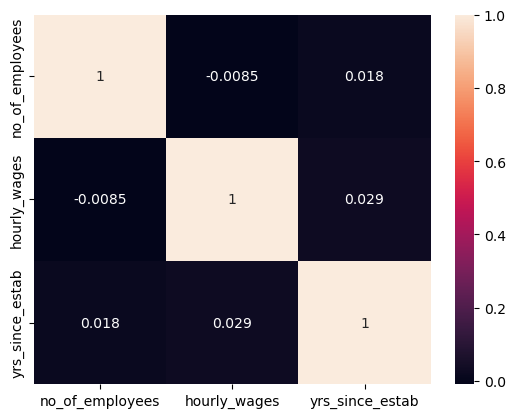

In [55]:
sns.heatmap(data=df.corr(numeric_only=True), annot=True)

* *Very **low correlation** values seen among the numerical features*

#### Count of applications by yrs_since_estab

<Axes: xlabel='yrs_since_estab', ylabel='Count'>

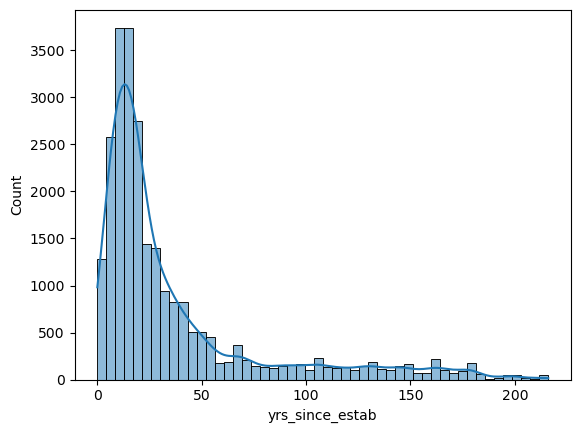

In [56]:
sns.histplot(data=df, x='yrs_since_estab', bins=50, kde=True)

* *The distribution is **highly right-skewed***
* *Majority of the employers are **less than 50 years old since establishment***

#### yrs_since_estab v/s visa case status

<Axes: xlabel='yrs_since_estab', ylabel='case_status'>

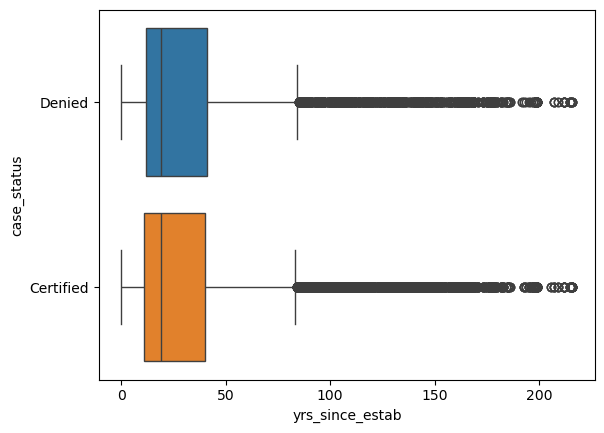

In [57]:
sns.boxplot(data=df, y='case_status', hue='case_status', x='yrs_since_estab')

#### yrs_since_estab v/s continent

<Axes: xlabel='yrs_since_estab', ylabel='continent'>

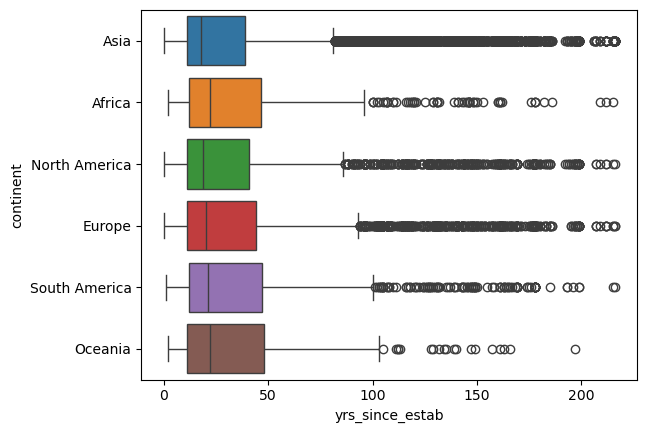

In [58]:
sns.boxplot(data=df, y='continent', hue='continent', x='yrs_since_estab')

#### yrs_since_estab v/s full_time_position

<Axes: xlabel='yrs_since_estab', ylabel='full_time_position'>

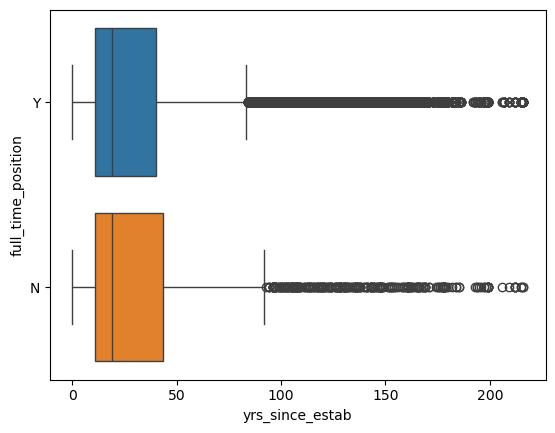

In [59]:
sns.boxplot(data=df, y='full_time_position', hue='full_time_position', x='yrs_since_estab')

## Data Preprocessing

### Treatment of missing values

There are no missing values in the data set

### Treatment of invalid values

In [60]:
#remove all rows where no_of_employees <= 0
df.drop(df.loc[df['no_of_employees'] <= 0].index, inplace=True)
df.reset_index()

,index,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,unit_of_wage,full_time_position,case_status,hourly_wages,yrs_since_estab
0,0,Asia,High School,N,N,14513,West,Hour,Y,Denied,592.202900,9
1,1,Asia,Master's,Y,N,2412,Northeast,Year,Y,Certified,40.108486,14
2,2,Asia,Bachelor's,N,Y,44444,West,Year,Y,Denied,59.133106,8
3,3,Asia,Bachelor's,N,N,98,West,Year,Y,Denied,40.112514,119
4,4,Africa,Master's,Y,N,1082,South,Year,Y,Certified,72.070861,11
...,...,...,...,...,...,...,...,...,...,...,...,...
25442,25475,Asia,Bachelor's,Y,Y,2601,South,Year,Y,Certified,37.063736,8
25443,25476,Asia,High School,Y,N,3274,Northeast,Year,Y,Certified,134.218649,10
25444,25477,Asia,Master's,Y,N,1121,South,Year,N,Certified,70.335986,106
25445,25478,Asia,Master's,Y,Y,1918,West,Year,Y,Certified,41.420563,129


* *The new modified dataset has **25447 rows***

### Treatment of outliers

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25447 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25447 non-null  object 
 1   education_of_employee  25447 non-null  object 
 2   has_job_experience     25447 non-null  object 
 3   requires_job_training  25447 non-null  object 
 4   no_of_employees        25447 non-null  int64  
 5   region_of_employment   25447 non-null  object 
 6   unit_of_wage           25447 non-null  object 
 7   full_time_position     25447 non-null  object 
 8   case_status            25447 non-null  object 
 9   hourly_wages           25447 non-null  float64
 10  yrs_since_estab        25447 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 2.3+ MB


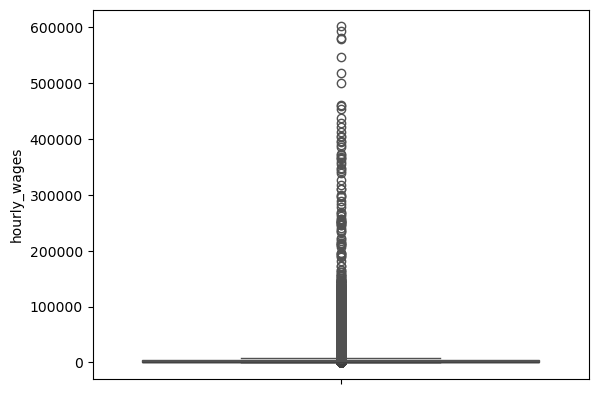

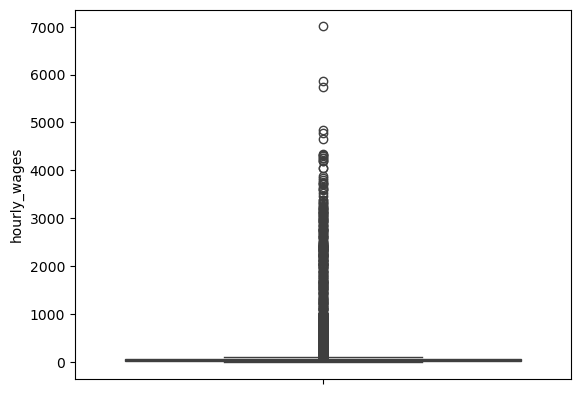

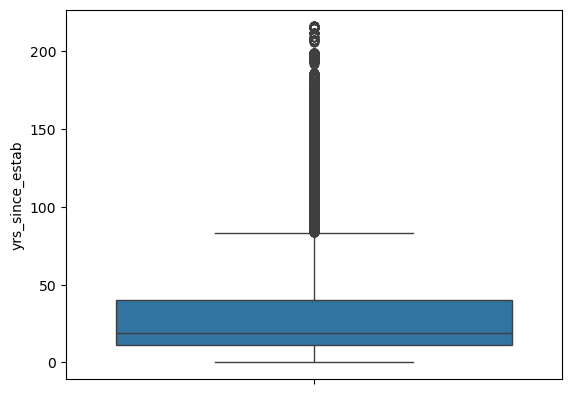

In [62]:
numerical_cols = df.select_dtypes(['int64', 'float64']).columns.tolist()
numerical_cols
sns.boxplot(data=df['hourly_wages'])
for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df[col])
    plt.show()

* *These **outliers need not be treated** as they represent **specific valid data** for their columns and cannot be imputed using any known methods as there is a **large variance and concentration of outliers in a large range***

In [63]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,unit_of_wage,full_time_position,case_status,hourly_wages,yrs_since_estab
0,Asia,High School,N,N,14513,West,Hour,Y,Denied,592.202900,9
1,Asia,Master's,Y,N,2412,Northeast,Year,Y,Certified,40.108486,14
2,Asia,Bachelor's,N,Y,44444,West,Year,Y,Denied,59.133106,8
3,Asia,Bachelor's,N,N,98,West,Year,Y,Denied,40.112514,119
4,Africa,Master's,Y,N,1082,South,Year,Y,Certified,72.070861,11


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25447 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25447 non-null  object 
 1   education_of_employee  25447 non-null  object 
 2   has_job_experience     25447 non-null  object 
 3   requires_job_training  25447 non-null  object 
 4   no_of_employees        25447 non-null  int64  
 5   region_of_employment   25447 non-null  object 
 6   unit_of_wage           25447 non-null  object 
 7   full_time_position     25447 non-null  object 
 8   case_status            25447 non-null  object 
 9   hourly_wages           25447 non-null  float64
 10  yrs_since_estab        25447 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 2.3+ MB


In [65]:
# convert the following into categorical variables  

for ftr in df.columns:
    if df[ftr].dtype == 'object':
        df[ftr] = pd.Categorical(df[ftr])

# Change representation of their data as follows:
# Unordered one hot encoding - continent, education_of_employee, region_of_employment, unit_of_wage
# Boolean - has_job_experience, requires_job_training, full_time_position, case_status

replaceStruct = {
    "has_job_experience" : {"N": 0, "Y": 1},
    "requires_job_training" : {"N": 0, "Y": 1},
    "full_time_position" : {"N": 0, "Y": 1}, 
    "case_status" : {"Denied": 0, "Certified": 1}
}

oneHotCols = ["continent", "education_of_employee", "region_of_employment", "unit_of_wage"]

df = df.replace(replaceStruct)
df = pd.get_dummies(df, columns=oneHotCols)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25447 entries, 0 to 25479
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   has_job_experience                 25447 non-null  category
 1   requires_job_training              25447 non-null  category
 2   no_of_employees                    25447 non-null  int64   
 3   full_time_position                 25447 non-null  category
 4   case_status                        25447 non-null  category
 5   hourly_wages                       25447 non-null  float64 
 6   yrs_since_estab                    25447 non-null  int64   
 7   continent_Africa                   25447 non-null  bool    
 8   continent_Asia                     25447 non-null  bool    
 9   continent_Europe                   25447 non-null  bool    
 10  continent_North America            25447 non-null  bool    
 11  continent_Oceania                  25447 non-n

In [66]:
#remove the last one hot coding column per generated set to avoid collinearity dummy variable trap.
df.drop(columns=["education_of_employee_Master's", 'region_of_employment_West', 'unit_of_wage_Year', 'continent_South America'], inplace=True)

In [67]:
df.head()

,has_job_experience,requires_job_training,no_of_employees,full_time_position,case_status,hourly_wages,yrs_since_estab,continent_Africa,continent_Asia,continent_Europe,...,education_of_employee_Bachelor's,education_of_employee_Doctorate,education_of_employee_High School,region_of_employment_Island,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,unit_of_wage_Hour,unit_of_wage_Month,unit_of_wage_Week
0,0,0,14513,1,0,592.202900,9,False,True,False,...,False,False,True,False,False,False,False,True,False,False
1,1,0,2412,1,1,40.108486,14,False,True,False,...,False,False,False,False,False,True,False,False,False,False
2,0,1,44444,1,0,59.133106,8,False,True,False,...,True,False,False,False,False,False,False,False,False,False
3,0,0,98,1,0,40.112514,119,False,True,False,...,True,False,False,False,False,False,False,False,False,False
4,1,0,1082,1,1,72.070861,11,True,False,False,...,False,False,False,False,False,False,True,False,False,False


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25447 entries, 0 to 25479
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   has_job_experience                 25447 non-null  category
 1   requires_job_training              25447 non-null  category
 2   no_of_employees                    25447 non-null  int64   
 3   full_time_position                 25447 non-null  category
 4   case_status                        25447 non-null  category
 5   hourly_wages                       25447 non-null  float64 
 6   yrs_since_estab                    25447 non-null  int64   
 7   continent_Africa                   25447 non-null  bool    
 8   continent_Asia                     25447 non-null  bool    
 9   continent_Europe                   25447 non-null  bool    
 10  continent_North America            25447 non-null  bool    
 11  continent_Oceania                  25447 non-n

* *The data set now is ready to be used to create ML model as all data preprocessing is complete and values are numerical. All unnecessary columns have been removed*
* ***The data set has 21 features and 1 target column***

In [69]:
X = df.drop(columns=['case_status'])
y = df['case_status']
print(X.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
Index: 25447 entries, 0 to 25479
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   has_job_experience                 25447 non-null  category
 1   requires_job_training              25447 non-null  category
 2   no_of_employees                    25447 non-null  int64   
 3   full_time_position                 25447 non-null  category
 4   hourly_wages                       25447 non-null  float64 
 5   yrs_since_estab                    25447 non-null  int64   
 6   continent_Africa                   25447 non-null  bool    
 7   continent_Asia                     25447 non-null  bool    
 8   continent_Europe                   25447 non-null  bool    
 9   continent_North America            25447 non-null  bool    
 10  continent_Oceania                  25447 non-null  bool    
 11  education_of_employee_Bachelor's   25447 non-n

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

## Evaluation metric

The following are the possible errors in the model:
1. False negative - **Predicting a visa denial when it should be certified**. This will lead to **loss of qualified talent** that can affect the initiative adversely
2. False positive - **Predicting a visa certification when it should be denied**. This will lead to **misinformation and may grant a non-deserving talent access to jobs**.

Both of the above seem as problems that OFLC would like to avoid and we cannot determine which is a bigger problem. Hence it is better to consider **F1-score as the evaluation metric** which is a the harmonic mean of both recall and precision.

In [71]:
def get_f1_score(model, Xtrain, Xtest, ytrain, ytest):
    # use model to predict on both training and test data
    score_list = []
    y_pred_train = model.predict(Xtrain)
    y_pred_test = model.predict(Xtest)
    train_f1_score = f1_score(ytrain, y_pred_train)
    test_f1_score = f1_score(ytest, y_pred_test)
    train_acc_score = accuracy_score(ytrain, y_pred_train)
    test_acc_score = accuracy_score(ytest, y_pred_test)
    train_recall_score = recall_score(ytrain, y_pred_train)
    test_recall_score = recall_score(ytest, y_pred_test)
    train_precision_score = precision_score(ytrain, y_pred_train)
    test_precision_score = precision_score(ytest, y_pred_test)
    
    score_list.extend((train_f1_score, test_f1_score, train_acc_score, test_acc_score, train_recall_score, test_recall_score, train_precision_score, test_precision_score))
    #return the predictions on train and test data for further analysis
    return [y_pred_train, y_pred_test, score_list]

def print_metrics(score_list):
    print("F1 score on training data: ", score_list[0])
    print("F1 score on test data: ", score_list[1])
    print("Accuracy on training data: ", score_list[2])
    print("Accuracy on test data: ", score_list[3])
    print("Recall score on training data: ", score_list[4])
    print("Recall score on test data: ", score_list[5])
    print("Precision score on training data: ", score_list[6])
    print("Precision score on test data: ", score_list[7])    

def confusion_matrix_map(model, target, predicted):
    cm = confusion_matrix(target, predicted)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, cmap="flare", fmt="")
    plt.ylabel("Truth")
    plt.xlabel("Prediction")

def print_ftr_importances(model):
    #print feature importances to draw conclusions for the business
    importances = model.feature_importances_
    indices = np.argsort(importances)
    feature_names = list(X_train.columns)
    #plt.figure(figsize=(12,12))
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

## Model building - Bagging

### Decision Tree

In [72]:
tree = DecisionTreeClassifier(criterion='gini', random_state=2)
tree.fit(X_train, y_train)
tree_preds = get_f1_score(tree, X_train, X_test, y_train, y_test)
print_metrics(tree_preds[2])

F1 score on training data:  1.0
F1 score on test data:  0.7432950191570882
Accuracy on training data:  1.0
Accuracy on test data:  0.6577603143418468
Recall score on training data:  1.0
Recall score on test data:  0.7415466039400176
Precision score on training data:  1.0
Precision score on test data:  0.7450516986706056


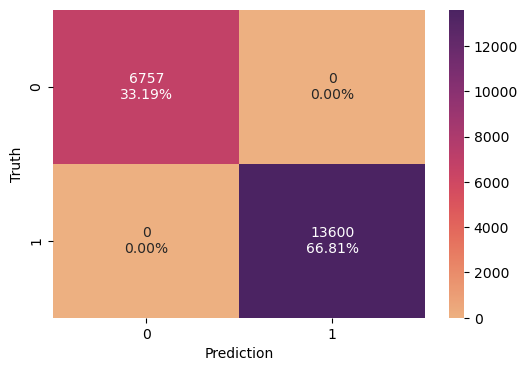

In [73]:
#confusion matrix on training data
confusion_matrix_map(tree, y_train, tree_preds[0])

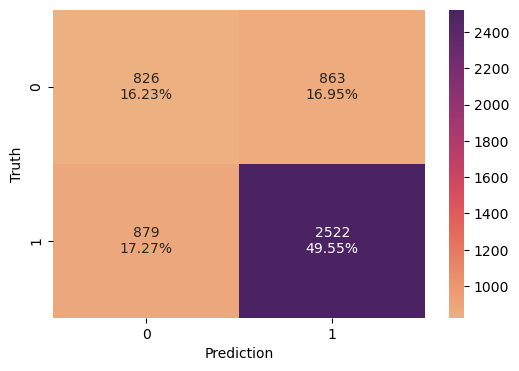

In [74]:
#confusion matrix on test data
confusion_matrix_map(tree, y_test, tree_preds[1])

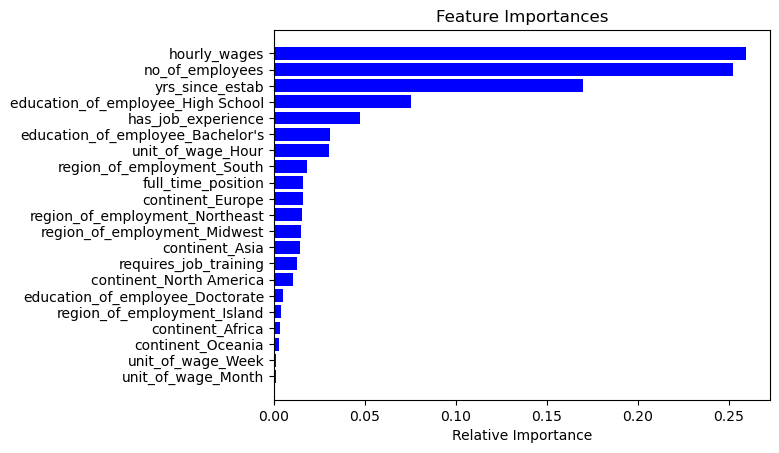

In [75]:
print_ftr_importances(tree)

### Bagging

In [76]:
baggingClassifier = BaggingClassifier(random_state=1)
baggingClassifier.fit(X_train, y_train)
bag_preds = get_f1_score(baggingClassifier, X_train, X_test, y_train, y_test)
print_metrics(bag_preds[2])

F1 score on training data:  0.9875840662183135
F1 score on test data:  0.776684774629276
Accuracy on training data:  0.9834946210148843
Accuracy on test data:  0.7011787819253438
Recall score on training data:  0.9825735294117647
Recall score on test data:  0.7777124375183769
Precision score on training data:  0.9926459664240084
Precision score on test data:  0.7756598240469208


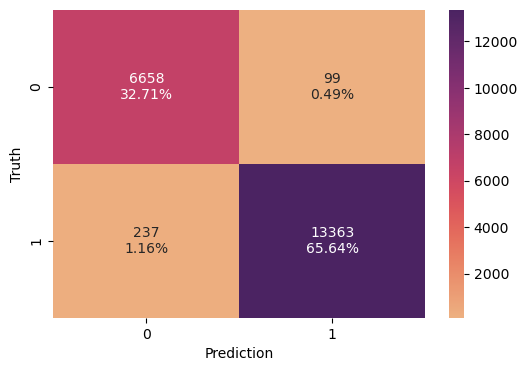

In [77]:
#confusion matrix on training data
confusion_matrix_map(baggingClassifier, y_train, bag_preds[0])

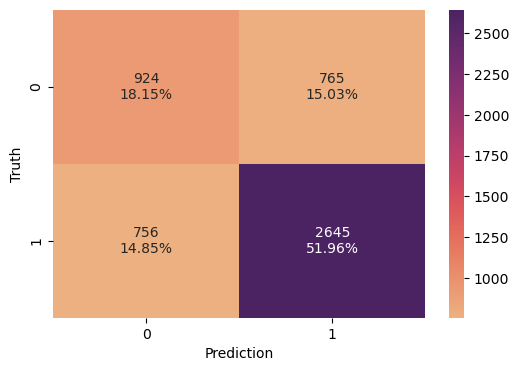

In [78]:
#confusion matrix on test data
confusion_matrix_map(baggingClassifier, y_test, bag_preds[1])

### Random Forest

In [79]:
#random forest classifier with n_estimators = 100 and max_features as sqrt
rfClassifier = RandomForestClassifier(random_state=1, max_features=15)
rfClassifier.fit(X_train, y_train)
rf_preds = get_f1_score(rfClassifier, X_train, X_test, y_train, y_test)
print_metrics(rf_preds[2])

F1 score on training data:  0.9999632366457115
F1 score on test data:  0.8085106382978723
Accuracy on training data:  0.9999508768482586
Accuracy on test data:  0.731237721021611
Recall score on training data:  1.0
Recall score on test data:  0.8491620111731844
Precision score on training data:  0.9999264759944122
Precision score on test data:  0.7715736040609137


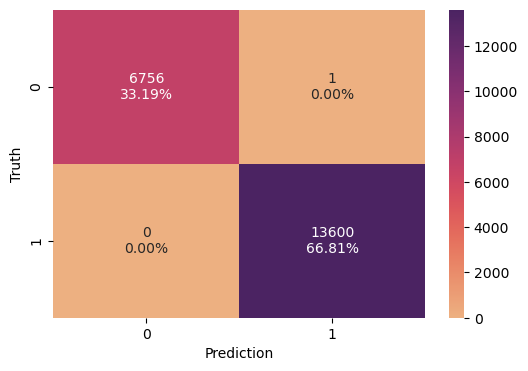

In [80]:
#confusion matrix on training data
confusion_matrix_map(rfClassifier, y_train, rf_preds[0])

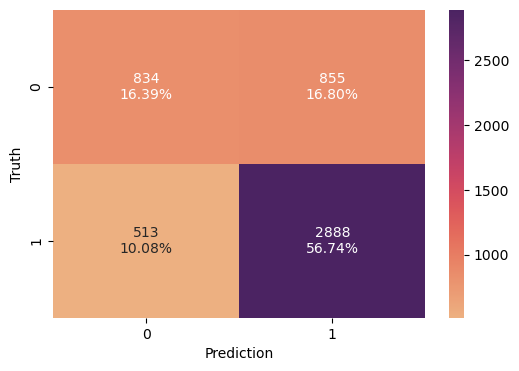

In [81]:
#confusion matrix on test data
confusion_matrix_map(rfClassifier, y_test, rf_preds[1])

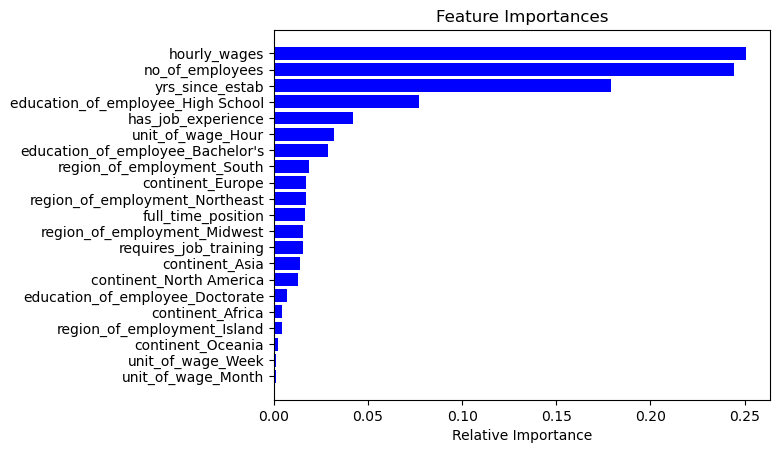

In [82]:
print_ftr_importances(rfClassifier)

## Model Improvement - Bagging

### Tuning the Decision Tree Model

In [83]:
# Grid of parameters to choose from using GridSearchCV for tuning
# Tuning the decision tree model with class weight Denied:Certified = 1:2 from data set analysis
parameters = {
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.3, 0.7, 0.1),
    "max_depth": np.arange(3, 8),
    "class_weight": [{0: 0.33, 1: 0.66}],
}

#metrics to compare models
scorer = make_scorer(f1_score)
gridCV = GridSearchCV(tree, param_grid=parameters, scoring=scorer)
gridCV.fit(X_train, y_train)

#pick the best model and fit
tuned_tree = gridCV.best_estimator_

tuned_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.33, 1: 0.66}, max_depth=3,
                       max_features=0.3, min_samples_leaf=5, random_state=2)

In [84]:
tuned_tree_preds = get_f1_score(tuned_tree, X_train, X_test, y_train, y_test)
print_metrics(tuned_tree_preds[2])

F1 score on training data:  0.819758549998373
F1 score on test data:  0.821442444645863
Accuracy on training data:  0.7279068625042983
Accuracy on test data:  0.7290766208251473
Recall score on training data:  0.9261764705882353
Recall score on test data:  0.9326668626874449
Precision score on training data:  0.7352752320354912
Precision score on test data:  0.7339194817214253


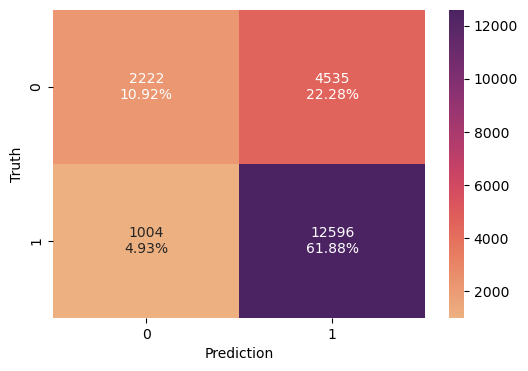

In [85]:
#confusion matrix on training data
confusion_matrix_map(tuned_tree, y_train, tuned_tree_preds[0])

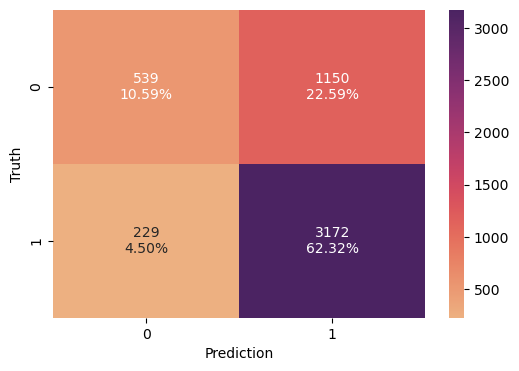

In [86]:
#confusion matrix on test data
confusion_matrix_map(tuned_tree, y_test, tuned_tree_preds[1])

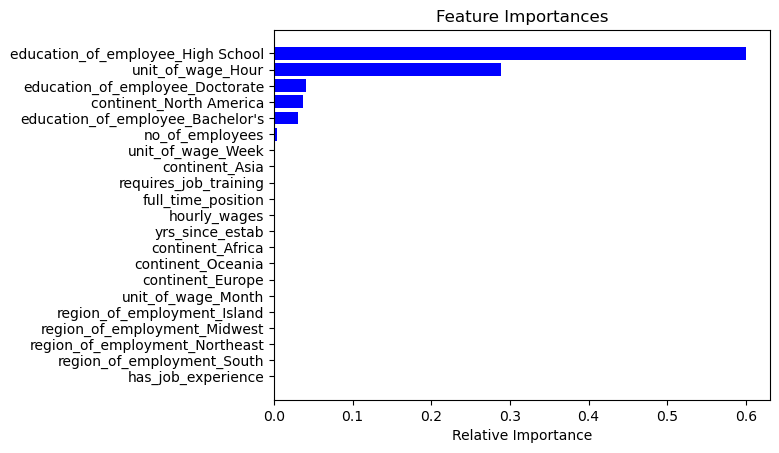

In [87]:
print_ftr_importances(tuned_tree)

### Tuning the Bagging Model

In [88]:
# Grid of parameters to choose from using GridSearchCV for tuning
parameters = {'max_samples': [0.7, 0.8, 0.9, 1], 
              'max_features': [0.7, 0.8, 0.9, 1],
              'n_estimators' : [10, 15, 20],
}

#metrics to compare models
scorer = make_scorer(f1_score)
gridCV = GridSearchCV(baggingClassifier, param_grid=parameters, scoring=scorer)
gridCV.fit(X_train, y_train)

#pick the best model and fit
tuned_bagging_classifier = gridCV.best_estimator_

tuned_bagging_classifier.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=1, n_estimators=20,
                  random_state=1)

In [89]:
tuned_bag_preds = get_f1_score(tuned_bagging_classifier, X_train, X_test, y_train, y_test)
print_metrics(tuned_bag_preds[2])

F1 score on training data:  0.8010130459110051
F1 score on test data:  0.8010835001766575
Accuracy on training data:  0.668074863683254
Accuracy on test data:  0.6681728880157171
Recall score on training data:  1.0
Recall score on test data:  1.0
Precision score on training data:  0.668074863683254
Precision score on test data:  0.6681728880157171


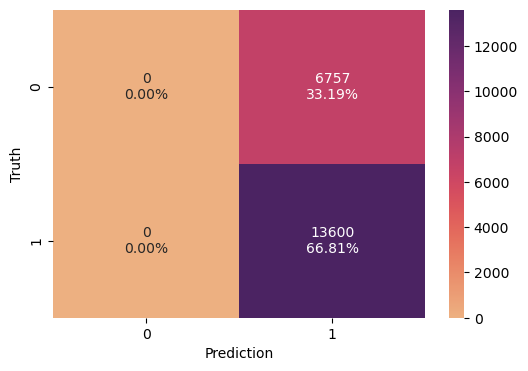

In [90]:
#confusion matrix on training data
confusion_matrix_map(tuned_bagging_classifier, y_train, tuned_bag_preds[0])

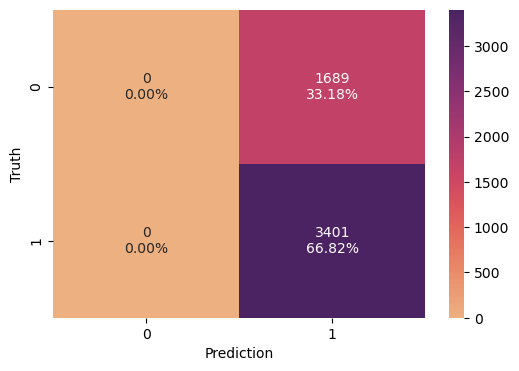

In [91]:
#confusion matrix on test data
confusion_matrix_map(tuned_bagging_classifier, y_test, tuned_bag_preds[1])

### Tuning the Bagging Model with base_estimator as LogisticRegression

In [92]:
tuned_bag_LR = BaggingClassifier(estimator=LogisticRegression(solver='liblinear', random_state=1), random_state=2)
tuned_bag_LR.fit(X_train,y_train)

BaggingClassifier(estimator=LogisticRegression(random_state=1,
                                               solver='liblinear'),
                  random_state=2)

In [93]:
tuned_bag_LR_preds = get_f1_score(tuned_bag_LR, X_train, X_test, y_train, y_test)
print_metrics(tuned_bag_LR_preds[2])

F1 score on training data:  0.8166134185303514
F1 score on test data:  0.8187684861521914
Accuracy on training data:  0.7321314535540601
Accuracy on test data:  0.7351669941060903
Recall score on training data:  0.8927205882352941
Recall score on test data:  0.8953249044398707
Precision score on training data:  0.7524635884722652
Precision score on test data:  0.7542729749814219


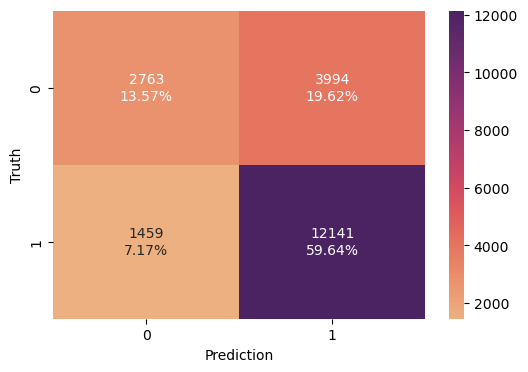

In [94]:
#confusion matrix on training data
confusion_matrix_map(tuned_bag_LR, y_train, tuned_bag_LR_preds[0])

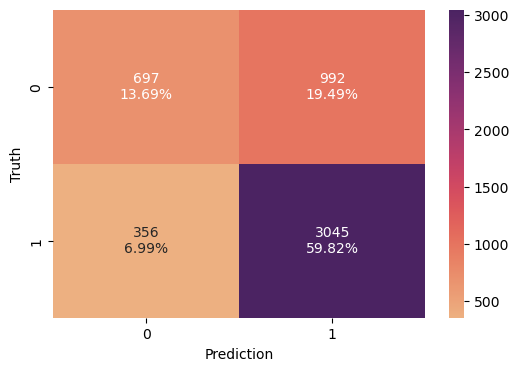

In [95]:
#confusion matrix on test data
confusion_matrix_map(tuned_bag_LR, y_test, tuned_bag_LR_preds[1])

### Tuning the Random Forest Model

In [96]:
# Grid of parameters to choose from using GridSearchCV for tuning
# Tuning the random forest model with class weight Denied:Certified = 1:2 from data set analysis
parameters = {
    "n_estimators": [10, 15, 20],
    "min_samples_leaf": np.arange(7, 10),
    "max_features": np.arange(0.5, 0.8, 0.1),
    "max_samples": np.arange(0.3, 0.5, 0.1),
    "class_weight": [{0: 0.33, 1: 0.66}],
}

#metrics to compare models
scorer = make_scorer(f1_score)
gridCV = GridSearchCV(rfClassifier, param_grid=parameters, scoring=scorer)
gridCV.fit(X_train, y_train)

#pick the best model and fit
tuned_rf_classifier = gridCV.best_estimator_

tuned_rf_classifier.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.33, 1: 0.66}, max_features=0.6,
                       max_samples=0.3, min_samples_leaf=9, n_estimators=15,
                       random_state=1)

In [97]:
tuned_rf_preds = get_f1_score(tuned_rf_classifier, X_train, X_test, y_train, y_test)
print_metrics(tuned_rf_preds[2])

F1 score on training data:  0.8388707011117954
F1 score on test data:  0.8204797523858653
Accuracy on training data:  0.7558088126934224
Accuracy on test data:  0.7265225933202357
Recall score on training data:  0.9514705882352941
Recall score on test data:  0.9353131431931785
Precision score on training data:  0.7501014433945858
Precision score on test data:  0.7307603951297955


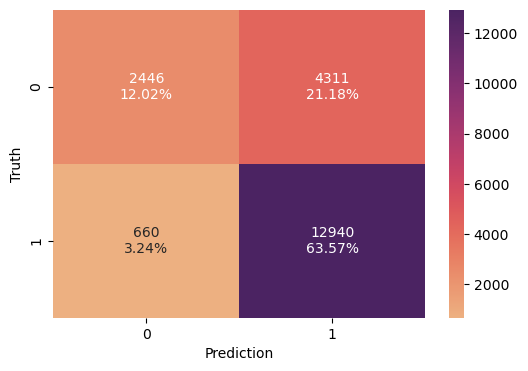

In [98]:
#confusion matrix on training data
confusion_matrix_map(tuned_rf_classifier, y_train, tuned_rf_preds[0])

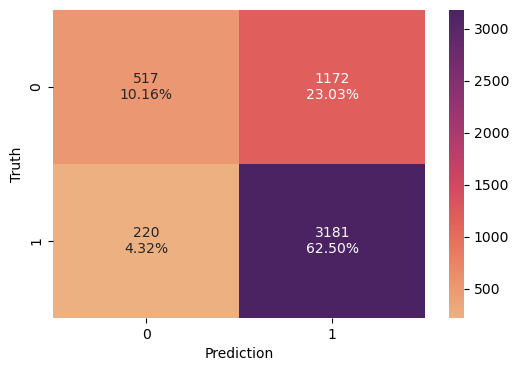

In [99]:
#confusion matrix on test data
confusion_matrix_map(tuned_rf_classifier, y_test, tuned_rf_preds[1])

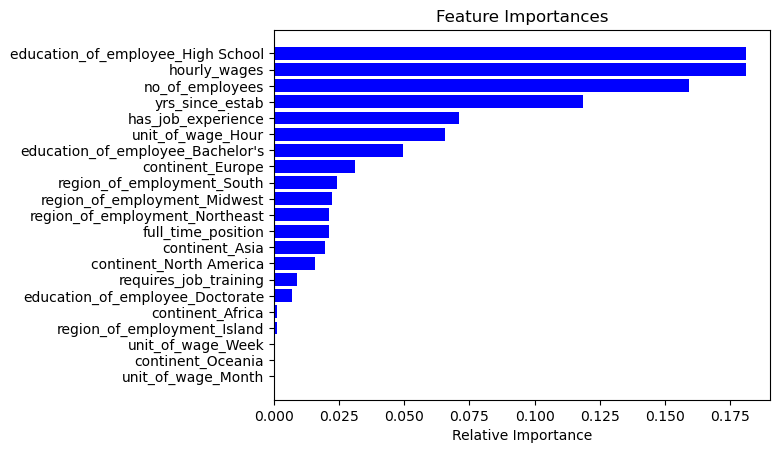

In [100]:
print_ftr_importances(tuned_rf_classifier)

## Model Building - Boosting

### AdaBoost

In [101]:
adaClassifier = AdaBoostClassifier(random_state=2)
adaClassifier.fit(X_train, y_train)          


AdaBoostClassifier(random_state=2)

In [102]:
ada_preds = get_f1_score(adaClassifier, X_train, X_test, y_train, y_test)
print_metrics(ada_preds[2])

F1 score on training data:  0.817792869269949
F1 score on test data:  0.8182187881252542
Accuracy on training data:  0.7364051677555632
Accuracy on test data:  0.7365422396856581
Recall score on training data:  0.8854411764705883
Recall score on test data:  0.8873860629226697
Precision score on training data:  0.7597476340694006
Precision score on test data:  0.7590543259557344


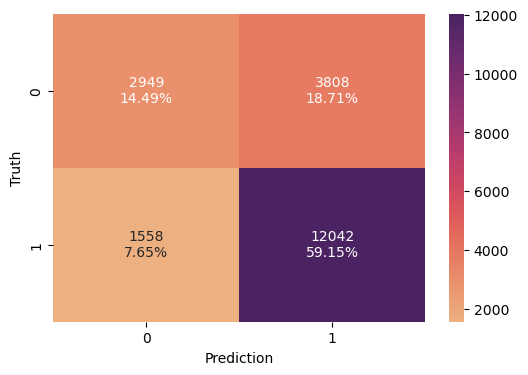

In [103]:
#confusion matrix on training data
confusion_matrix_map(adaClassifier, y_train, ada_preds[0])

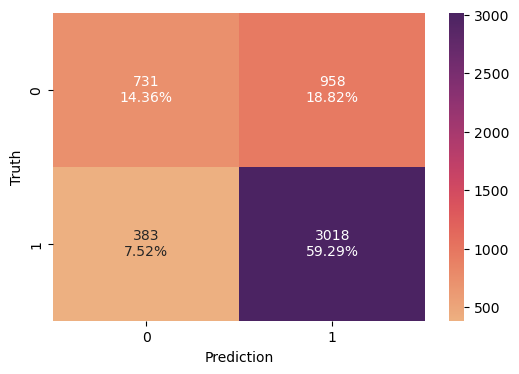

In [104]:
#confusion matrix on test data
confusion_matrix_map(adaClassifier, y_test, ada_preds[1])

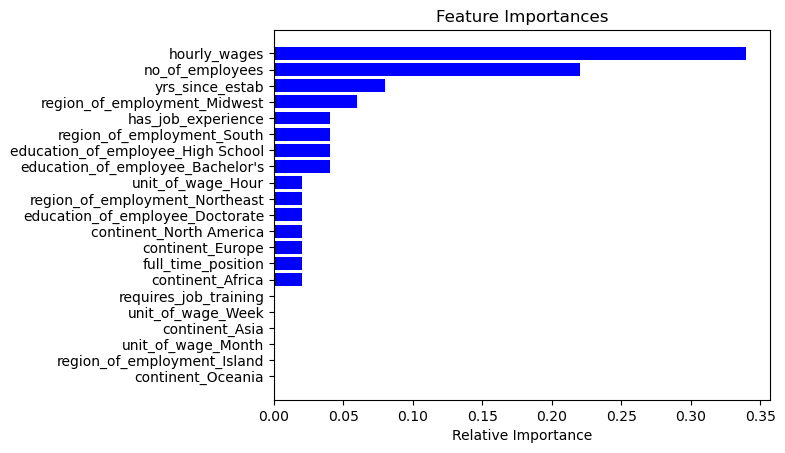

In [105]:
print_ftr_importances(adaClassifier)

### GradientBoost

In [106]:
gbClassifier = GradientBoostingClassifier(random_state=2)
gbClassifier.fit(X_train, y_train)          


GradientBoostingClassifier(random_state=2)

In [107]:
gb_preds = get_f1_score(gbClassifier, X_train, X_test, y_train, y_test)
print_metrics(gb_preds[2])

F1 score on training data:  0.8266361301964049
F1 score on test data:  0.822992952881028
Accuracy on training data:  0.754580733899887
Accuracy on test data:  0.7483300589390963
Recall score on training data:  0.8758088235294118
Recall score on test data:  0.8756248162305205
Precision score on training data:  0.7826915494808779
Precision score on test data:  0.7763295099061522


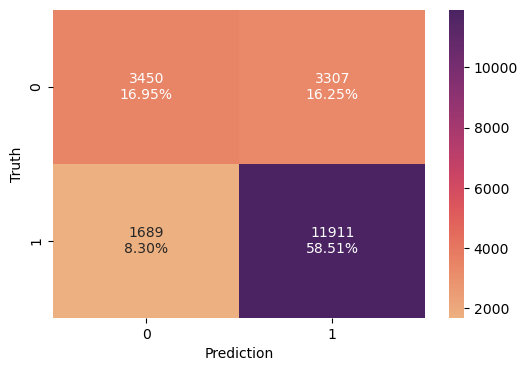

In [108]:
#confusion matrix on training data
confusion_matrix_map(gbClassifier, y_train, gb_preds[0])

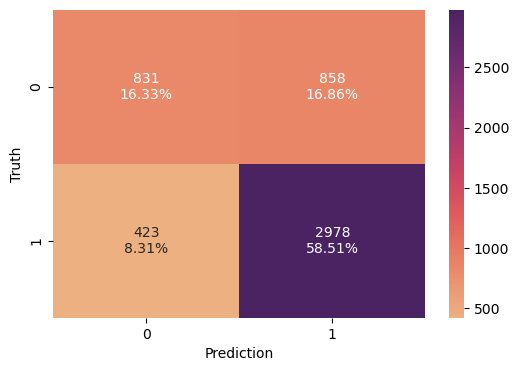

In [109]:
#confusion matrix on test data
confusion_matrix_map(gbClassifier, y_test, gb_preds[1])

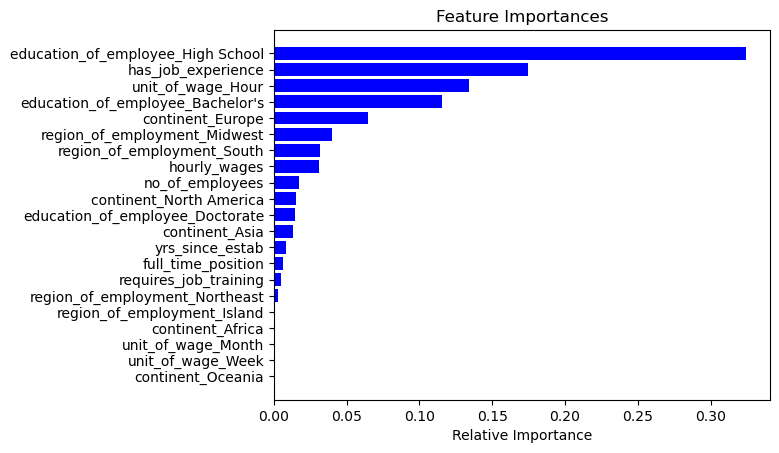

In [110]:
print_ftr_importances(gbClassifier)

## Model Improvement - Boosting

### Tuning the AdaBoost model

In [111]:
# Grid of parameters to choose from using GridSearchCV for tuning
parameters = {
    "n_estimators": [10,15,20],
    "learning_rate": np.arange(0.4, 1.4, 0.2)
}

#metrics to compare models
scorer = make_scorer(f1_score)
gridCV = GridSearchCV(adaClassifier, param_grid=parameters, scoring=scorer)
gridCV.fit(X_train, y_train)

#pick the best model and fit
tuned_ada_classifier = gridCV.best_estimator_

tuned_ada_classifier.fit(X_train, y_train)


AdaBoostClassifier(learning_rate=0.6000000000000001, n_estimators=20,
                   random_state=2)

In [112]:
tuned_ada_preds = get_f1_score(tuned_ada_classifier, X_train, X_test, y_train, y_test)
print_metrics(tuned_ada_preds[2])

F1 score on training data:  0.8177141883835802
F1 score on test data:  0.8189619942787087
Accuracy on training data:  0.7371420150316844
Accuracy on test data:  0.7388998035363458
Recall score on training data:  0.8825
Recall score on test data:  0.883857688915025
Precision score on training data:  0.7617899079657252
Precision score on test data:  0.7629441624365483


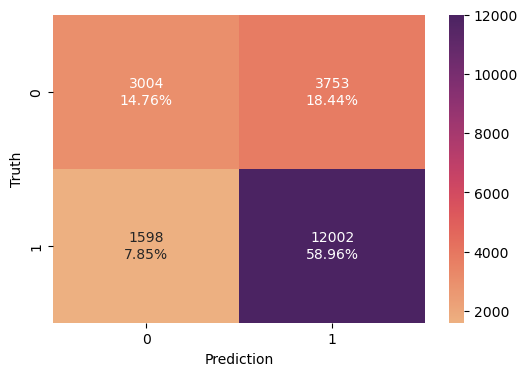

In [113]:
#confusion matrix on training data
confusion_matrix_map(tuned_ada_classifier, y_train, tuned_ada_preds[0])

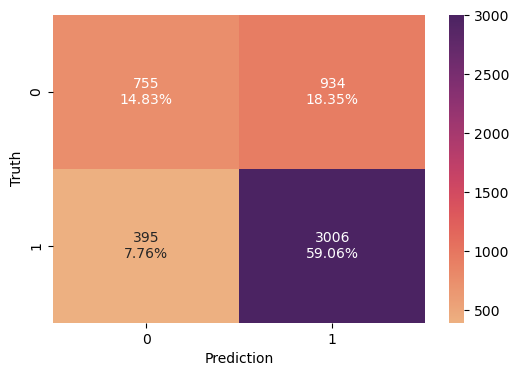

In [114]:
#confusion matrix on training data
confusion_matrix_map(tuned_ada_classifier, y_test, tuned_ada_preds[1])

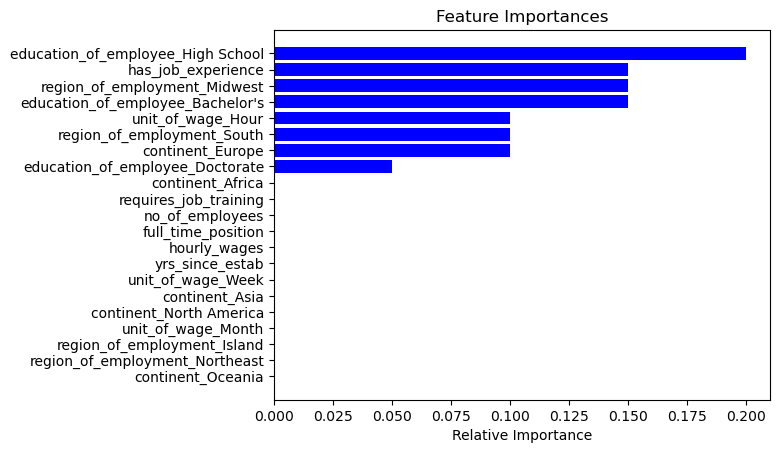

In [115]:
print_ftr_importances(tuned_ada_classifier)

### Tuning the GradientBoost model

In [116]:
# Grid of parameters to choose from using GridSearchCV for tuning
parameters = {
    "n_estimators": [10,15,20],
    "learning_rate": np.arange(0.6, 1.0, 0.2),
    "max_depth": np.arange(7, 10),
    "max_features": np.arange(0.4, 0.8, 0.2),
}

#metrics to compare models
scorer = make_scorer(f1_score)
gridCV = GridSearchCV(gbClassifier, param_grid=parameters, scoring=scorer)
gridCV.fit(X_train, y_train)

#pick the best model and fit
tuned_gb_classifier = gridCV.best_estimator_

tuned_gb_classifier.fit(X_train, y_train)


GradientBoostingClassifier(learning_rate=0.6, max_depth=7, max_features=0.4,
                           n_estimators=10, random_state=2)

In [117]:
tuned_gb_preds = get_f1_score(tuned_gb_classifier, X_train, X_test, y_train, y_test)
print_metrics(tuned_gb_preds[2])

F1 score on training data:  0.8449833240689272
F1 score on test data:  0.8168002210555403
Accuracy on training data:  0.780812496929803
Accuracy on test data:  0.7394891944990177
Recall score on training data:  0.8941911764705882
Recall score on test data:  0.8691561305498383
Precision score on training data:  0.8009088514225501
Precision score on test data:  0.7703935366171488


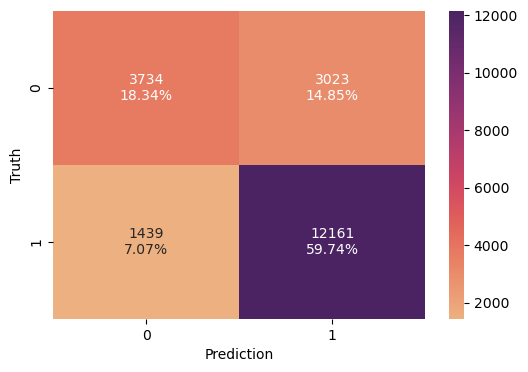

In [118]:
#confusion matrix on training data
confusion_matrix_map(tuned_gb_classifier, y_train, tuned_gb_preds[0])

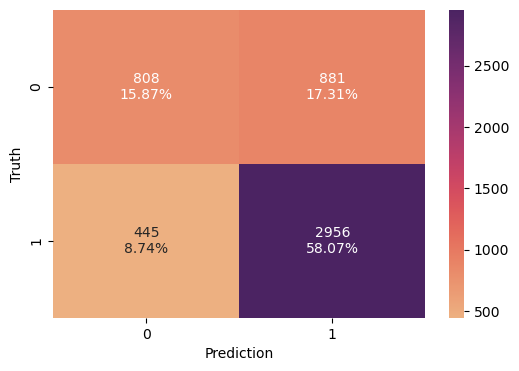

In [119]:
#confusion matrix on training data
confusion_matrix_map(tuned_gb_classifier, y_test, tuned_gb_preds[1])

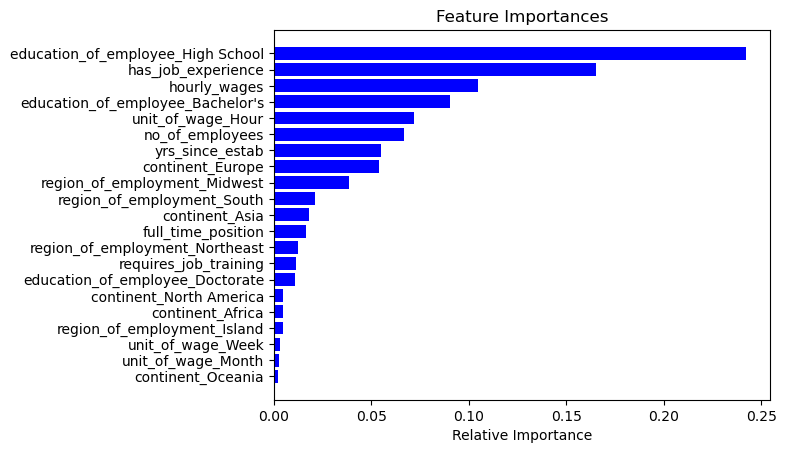

In [120]:
print_ftr_importances(tuned_gb_classifier)

## Actionable insights and recommendations

Bringing everything down together let us compare the metrics of all the models created till now and conclude on the final one 

In [121]:
models = [tree, baggingClassifier, rfClassifier, tuned_tree, tuned_bagging_classifier, tuned_bag_LR, tuned_rf_classifier, 
          adaClassifier, gbClassifier, tuned_ada_classifier, tuned_gb_classifier]

train_accuracy = []
test_accuracy = []
train_f1 = []
test_f1 = []
train_recall = []
test_recall = []
train_precision = []
test_precision = []

for model in models:
    score_list = get_f1_score(model, X_train, X_test, y_train, y_test)[2]
    train_f1.append(score_list[0])
    test_f1.append(score_list[1])
    train_accuracy.append(score_list[2])
    test_accuracy.append(score_list[3])
    train_recall.append(score_list[4])
    test_recall.append(score_list[5])
    train_precision.append(score_list[6])
    test_precision.append(score_list[7])

compdf = pd.DataFrame({"Model": ['Simple Decision Tree Classifier', 'Simple Bagging Classifer', 'Simple Random Forest Classifier', 
                                'Tuned Decision Tree Classifier', 'Tuned Bagging Classifier', 'Bagging Classifier with estimator=LogReg', 
                                'Tuned Random Forest Classifier', 'Simple AdaBoosting', 'Simple GradientBoosting', 'Tuned AdaBoosting', 
                                'Tuned GradientBoosting'],
                       "Train F1 score": train_f1,
                       "Test F1 score": test_f1,
                       "Train Accuracy": train_accuracy,
                       "Test Accuracy": test_accuracy,
                       "Train Recall Score": train_recall,
                       "Test Recall Score": test_recall,
                       "Train Precision Score": train_precision,
                       "Test Precision Score": test_precision
                      })
compdf
                
                      

,Model,Train F1 score,Test F1 score,Train Accuracy,Test Accuracy,Train Recall Score,Test Recall Score,Train Precision Score,Test Precision Score
0,Simple Decision Tree Classifier,1.000000,0.743295,1.000000,0.657760,1.000000,0.741547,1.000000,0.745052
1,Simple Bagging Classifer,0.987584,0.776685,0.983495,0.701179,0.982574,0.777712,0.992646,0.775660
2,Simple Random Forest Classifier,0.999963,0.808511,0.999951,0.731238,1.000000,0.849162,0.999926,0.771574
3,Tuned Decision Tree Classifier,0.819759,0.821442,0.727907,0.729077,0.926176,0.932667,0.735275,0.733919
4,Tuned Bagging Classifier,0.801013,0.801084,0.668075,0.668173,1.000000,1.000000,0.668075,0.668173
5,Bagging Classifier with estimator=LogReg,0.816613,0.818768,0.732131,0.735167,0.892721,0.895325,0.752464,0.754273
6,Tuned Random Forest Classifier,0.838871,0.820480,0.755809,0.726523,0.951471,0.935313,0.750101,0.730760
7,Simple AdaBoosting,0.817793,0.818219,0.736405,0.736542,0.885441,0.887386,0.759748,0.759054
8,Simple GradientBoosting,0.826636,0.822993,0.754581,0.748330,0.875809,0.875625,0.782692,0.776330
9,Tuned AdaBoosting,0.817714,0.818962,0.737142,0.738900,0.882500,0.883858,0.761790,0.762944


*From the above data:*
* *All **simple basic classifiers overfit the training data** and show **significantly lower scores on test data***
* *Based on F1 score, **Tuned Random Forest Classifier performs best on training and test data**. It also has **comparatively very good accuracy, recall and precision score** compared to other models for both train and test data and **values are closer to each other in both**.*
* *The **next best model** based on F1 score is the **Tuned GradientBoosting model** with **slightly bigger gap in training and test scores**, but sometimes also **scoring better in accuracy, recall and precision scores on training data**.*
* *Since **F1 is the evaluation metric** used in the exercise, we will select the following **Tuned Random Forest Classifier as the final model***

In [122]:
tuned_rf_classifier

RandomForestClassifier(class_weight={0: 0.33, 1: 0.66}, max_features=0.6,
                       max_samples=0.3, min_samples_leaf=9, n_estimators=15,
                       random_state=1)

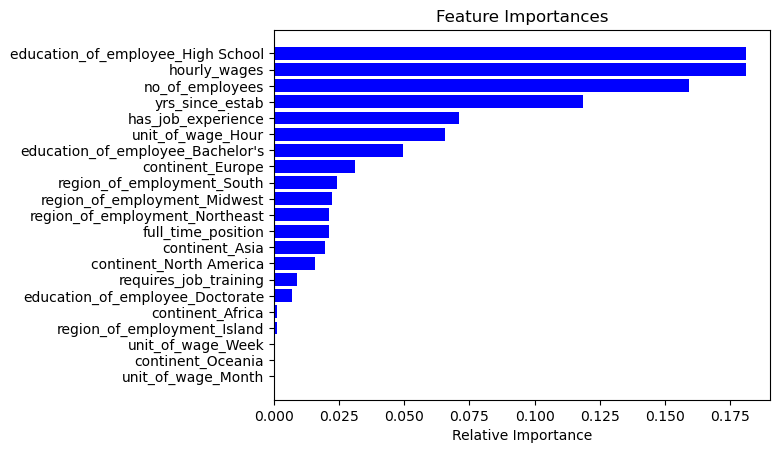

In [123]:
print_ftr_importances(tuned_rf_classifier)

### Insights 

From the Exploratory Data Analysis:

* ***Education has a significant influence** on the Visa certification progress*
* *Applicants who have completed their **Bachelor's, Master's and Doctorate** have a **higher probablility of getting visa certified** at **62.2%, 78.6% and 87.2% respectively**. The magnitude of the percentages also indicates that **higher the education level, higher the chances of visa certification***
* *Applicants who have just completed **High School** have a **higher visa denial rate of 65.9%***
* *The number of visa **certified applicants is higher than denied applicants in all continents***
* *The **highest number of applications** come from the **Asia** continent*
* *The **lowest number of applications** come from the **Oceania** continent*
* *The **highest percentages** of visa applications getting certified is from **Europe continent at 79.2%** and **Africa continent at 72%***
* *The **lowest percentages** of visa applications getting certified is from **North America continent at 61.9%** and **South America continent at 57.8%***
* ***Irrespective of whether the applicants have job experience or not, the number of visa certified aplicants are greater than denied ones***
* ***Having job experience has a big impact on the probability of getting visa certified***
* ***74.4% of experienced candidates** got visa certified*
* *Only **56.1% of inexperienced candidates** got visa certified*
* ***Hourly wage associates** are **least preferred** for visa certification and have a **high denial rate of 65.3%***
* *Other wage employees have a **close certification rate in the 60s percentages** indicating that there is **not much difference of probabilities in certification chances**.*
* *The **maximum number of visa applications** received are from the **yearly wage applicants**.*
* ***Majority** of the applicants are in the very **low 0-100 range***
* *The hourly_wages value has extremely **high variance***
* *Applicants of high **hourly wage > about 5800 are all certified***
* *A significantly **high number of applicants require no job training** compared to those who do*
* ***Asia continent has the highest number of applications at 66%** by a very big margin, whereas **Oceania continent has the lowest at 0.7%***
* *People with **Bachelor's and Master's education contribute to about 78% of applications** in the data set*
* ***88.4% of the visa applicants require job training***
* *The data set has a **good mix of experienced and inexperienced candidates of 58% and 42%** respectively*
* *Regions of employment is **fairly consistent across most regions of the US**, except the **Island region that accounts for about 1.5%** only*
* ***89% of the applicants considered full time positions***
* *The **ratio of certified:denied is 2:1**. This fact can be used while **assigning class_weights to models***

From the models:
* *Based on F1 score, **Tuned Random Forest Classifier performs best on training and test data**. It also has **comparatively very good accuracy, recall and precision score** compared to other models for both train and test data and **values are closer to each other in both**.*
* *The **next best model** based on F1 score is the **Tuned GradientBoosting model** with **slightly bigger gap in training and test scores**, but sometimes also **scoring better in accuracy, recall and precision scores on training data**.*
* *The features in the model that have the **largest importance** are **education_of_employee_High School, hourly_wages, no_of_employees, yrs_since_estab, has_job_experience, unit_of_wage_Hour****

### Recommendations

Based on the above observations, the following are the recommendations to OLCF:
* *Consider **applicants from medium to high education** that have a **greater chance of potential talent***
* *The feature **continent_Europe is showing a good importance** towards the model, whereas the EDA tells that there are **considerably lesser European applicants**. The **chances of getting certified are also higher for European applicants at 79.23%**. It could be worth **processing more applications from Europe** and tune the model further for better talent*
* *Consider **applicants with longer unit of wage** and those who consider **full time positions***
* ***Build/Improve job training logistics** as majority of applicants need job training*
* *Experiment with **attractive jobs even from mid and lower sized companies**(lower yrs_since_estab and lower no_of_employees) and tune the models to investigate significance*
* *Look out for **experienced candidates for a higher chance of potential talent***
* Applicants with a **higher unit of wage** are likely to be better candidates